In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [2]:
# from tf.keras.models import Sequential # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau

# ModelCheckpoint

In [3]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
from tslearn.utils import to_time_series
from tslearn.utils import to_time_series_dataset
from tslearn.datasets import UCR_UEA_datasets
from tslearn.clustering import TimeSeriesKMeans

In [4]:
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [5]:
# import pandas as pd

# # 판다스 데이터프레임(DataFrame)을 출력할 때, 최대 출력할 수 있는 컬럼을 100개로 늘려줍니다.
# # 이렇게 해야 데이터를 분석할 때 출력해서 확인하기 편합니다.
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [6]:
# train_sample = pd.read_csv('train_sample_addFeature',index_col='Time',parse_dates=True)
# test_sample = pd.read_csv('test_sample_addFeature',index_col='Time',parse_dates=True)

In [7]:
# train = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/train.csv',index_col='Time',parse_dates=True)
# test = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/test.csv',index_col='Time',parse_dates=True)

In [8]:
# weather_time = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/인천_시간별_기상자료.csv',encoding='euc-kr',index_col='일시',parse_dates=True)
# del weather_time['지점']

# weather_day = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/인천_일별_기상자료.csv',encoding='euc-kr',index_col='일시',parse_dates=True)
# del weather_day['지점']

In [9]:
# for k in range(1,len(train.columns) ): #시간을 제외한 1열부터 마지막 열까지를 for문으로 작동시킵니다.
#     train_median=train.iloc[:,k].median() #값을 대체하는 과정에서 값이 변경 될 것을 대비해 해당 세대의 중앙값을 미리 계산하고 시작합니다.
#     counting=train.loc[ train.iloc[:,k].isnull()==False ][ train.columns[k] ].index

#     df=pd.DataFrame( list( zip( counting[:-1], counting[1:] - counting[:-1] -1  ) ), columns=['index','count'] )
    
#     df2= df[ (df['count'] > 0) ] #결측치가 존재하는 부분만 추출
#     df2=df2.reset_index(drop=True) #기존에 존재하는 index를 초기화 하여 이후 for문에 사용함

#     for i,j in zip( df2['index'], df2['count'] ) : # i = 해당 세대에서 값이 존재하는 index, j = 현재 index 밑의 결측치 갯수
#         if train.iloc[i,k]>=train_median: #현재 index에 존재하는 값이 해당 세대의 중앙 값 이상일때만 분산처리 실행
#             train.iloc[ i : i+j+1 , k] = train.iloc[i,k] / (j+1) 
#             #현재 index 및 결측치의 갯수 만큼 지정을 하여, 현재 index에 있는 값을 해당 갯수만큼 나누어 줍니다
#         else:
#             pass
#             #현재 index에 존재하는 값이 중앙 값 미만이면 pass를 실행
#     if k%50==0: #for문 진행정도 확인용
#             print(k,"번째 실행중")

In [10]:
# for k in range(1,len(test.columns) ): #시간을 제외한 1열부터 마지막 열까지를 for문으로 작동시킵니다.
#     test_median=test.iloc[:,k].median() #값을 대체하는 과정에서 값이 변경 될 것을 대비해 해당 세대의 중앙값을 미리 계산하고 시작합니다.
#     counting=test.loc[ test.iloc[:,k].isnull()==False ][ test.columns[k] ].index

#     df=pd.DataFrame( list( zip( counting[:-1], counting[1:] - counting[:-1] -1  ) ), columns=['index','count'] )
    
#     df2= df[ (df['count'] > 0) ] #결측치가 존재하는 부분만 추출
#     df2=df2.reset_index(drop=True) #기존에 존재하는 index를 초기화 하여 이후 for문에 사용함

#     for i,j in zip( df2['index'], df2['count'] ) : # i = 해당 세대에서 값이 존재하는 index, j = 현재 index 밑의 결측치 갯수
#         if test.iloc[i,k]>=test_median: #현재 indetestx에 존재하는 값이 해당 세대의 중앙 값 이상일때만 분산처리 실행
#             test.iloc[ i : i+j+1 , k] = test.iloc[i,k] / (j+1) 
#             #현재 index 및 결측치의 갯수 만큼 지정을 하여, 현재 index에 있는 값을 해당 갯수만큼 나누어 줍니다
#         else:
#             pass
#             #현재 index에 존재하는 값이 중앙 값 미만이면 pass를 실행
#     if k%50==0: #for문 진행정도 확인용
#             print(k,"번째 실행중")

In [11]:
# train['Time'] = train['Time'].apply(pd.to_datetime)
# train.set_index('Time',inplace=True)

# test['Time'] = test['Time'].apply(pd.to_datetime)
# test.set_index('Time',inplace=True)

In [12]:
# train_sample = train['2018-02-15':]
# train_sample = train_sample.interpolate(method='values')

# test_sample = test['2018-02-15':]
# test_sample = test_sample.interpolate(method='values')

In [13]:
# #결측값 가진 행 제거 - 데이터가 아예 없는 경우
# train_sample.loc[:,train_sample.isnull().sum() >= 1].columns

In [14]:
# #결측값 가진 행 제거 - 데이터가 아예 없는 경우
# test_sample.loc[:,test_sample.isnull().sum() >= 1].columns

In [15]:
# train_sample.drop(['X4', 'X127', 'X9', 'X65', 'X54', 'X13', 'X53', 'X24', 'X17', 'X14',
#        'X48', 'X2', 'X19', 'X36', 'X28', 'X63', 'X38', 'X39', 'X8', 'X64',
#        'X29', 'X57', 'X705', 'X71', 'X3', 'X27', 'X22', 'X21', 'X118', 'X6',
#        'X45', 'X40', 'X66', 'X52', 'X12', 'X49', 'X1', 'X33', 'X60', 'X46',
#        'X963', 'X56', 'X15', 'X11', 'X25', 'X34', 'X23', 'X58'], axis=1, inplace=True)

# test_sample.drop(['X26', 'X16', 'X7', 'X18', 'X41', 'X55', 'X5', 'X43', 'X59', 'X10',
#        'X62', 'X61', 'X32', 'X31', 'X30', 'X51', 'X35', 'X44', 'X37', 'X42',
#        'X50', 'X47', 'X20'],axis=1,inplace=True)

> 입력신호 추가

In [16]:
# train_sample['temp'] = weather_time['기온(°C)']['2018-02-15':'2018-06-30'] 
# train_sample['humidity'] = weather_time['습도(%)']['2018-02-15':'2018-06-30'] 
# train_sample[['temp','humidity']] = train_sample[['temp','humidity']].interpolate(method='values')  # 온도 결측값을 시간에 따른 보간법으로 채움
# train_sample['Day'] = train_sample.index.dayofyear
# train_sample['Hour'] = train_sample.index.hour




# test_sample['temp'] = weather_time['기온(°C)']['2018-02-15':'2018-06-30']
# test_sample['humidity'] = weather_time['습도(%)']['2018-02-15':'2018-06-30'] 
# test_sample[['temp','humidity']] = test_sample[['temp','humidity']].interpolate(method='values')  # 온도 결측값을 시간에 따른 보간법으로 채움
# test_sample['Day'] = test_sample.index.dayofyear
# test_sample['Hour'] = test_sample.index.hour

In [17]:
# train_sample.to_csv('train_sample_addFeature')
# test_sample.to_csv('test_sample_addFeature')

> Input 형식

>  (전체세대시간, 24시간, 2 )

In [18]:
train_sample = pd.read_csv('train_sample_addFeature',index_col='Time',parse_dates=True)
test_sample = pd.read_csv('test_sample_addFeature',index_col='Time',parse_dates=True)

In [19]:
train_B_index = train_sample['2018-02-19':].resample('B').sum().index
test_B_index = test_sample['2018-02-19':].resample('B').sum().index

train_sample = train_sample.resample('D').sum().reindex(train_B_index)
test_sample = test_sample.resample('D').sum().reindex(test_B_index)

In [20]:
from sklearn.preprocessing import MinMaxScaler

sc_train = MinMaxScaler() # trainSet scaler
sc_test = MinMaxScaler() # testSet scaler
sc_temp = MinMaxScaler() # temp scaler
sc_humidity = MinMaxScaler() # temp scaler


train_sample_sc = sc_train.fit_transform(train_sample.iloc[:,:-4])
test_sample_sc = sc_test.fit_transform(test_sample.iloc[:,:-4])
temp_sc = sc_temp.fit_transform(train_sample[['temp']])
humidity_sc = sc_humidity.fit_transform(train_sample[['humidity']])


train_sample_sc = np.concatenate((train_sample_sc, temp_sc), axis=1)
train_sample_sc = np.concatenate((train_sample_sc, humidity_sc), axis=1)




test_sample_sc = np.concatenate((test_sample_sc, temp_sc), axis=1)
test_sample_sc = np.concatenate((test_sample_sc, humidity_sc), axis=1)

In [21]:
train_sample = pd.DataFrame(train_sample_sc, columns=train_sample.columns[:-2],index=train_sample.index)
test_sample = pd.DataFrame(test_sample_sc, columns=test_sample.columns[:-2],index=test_sample.index)

In [22]:
shift_step = 5
feature_len = 3

In [23]:
tmp_list = [] 
for i in train_sample.columns[:-2]:
    tmp_list.append(train_sample[[i,'temp','humidity']].values[:-shift_step].reshape(18,5,3)) 

to_formatted_x = np.array(tmp_list)

In [24]:
res_x = to_formatted_x.reshape(to_formatted_x.shape[0]*to_formatted_x.shape[1],shift_step,feature_len)

res_x.shape

(22536, 5, 3)

In [25]:
for_shifting_y = train_sample.shift(-shift_step)
# for_shifting_y=for_shifting_y.dropna()

tmp_shift_list = []
for i in train_sample.columns[:-2]:
    tmp_shift_list.append(for_shifting_y[i].values[:-shift_step].reshape(18,5,1))

to_formatted_y = np.array(tmp_shift_list)

In [26]:
res_y = to_formatted_y.reshape(to_formatted_x.shape[0]*to_formatted_x.shape[1],shift_step,1)

res_y.shape

(22536, 5, 1)

In [27]:
############################################### TEST DATA #############################################################

In [28]:
tmp_test_list = [] 
for i in test_sample.columns[:-2]:
    tmp_test_list.append(test_sample[[i,'temp','humidity']].values[:-shift_step].reshape(18,5,3)) 

to_formatted_test_x = np.array(tmp_test_list)

In [29]:
res_test_x = to_formatted_test_x.reshape(to_formatted_test_x.shape[0]*to_formatted_test_x.shape[1],shift_step,feature_len)

res_test_x.shape

(3186, 5, 3)

In [30]:
for_shifting_y = test_sample.shift(-shift_step)

tmp_test_shift_list = []
for i in test_sample.columns[:-2]:
    tmp_test_shift_list.append(for_shifting_y[i].values[:-shift_step].reshape(18,5,1))

to_formatted_test_y = np.array(tmp_test_shift_list)

In [31]:
# to_formatted_test_y.shape

In [32]:
res_test_y = to_formatted_test_y.reshape(to_formatted_test_x.shape[0]*to_formatted_test_x.shape[1],5,1)

res_test_y.shape

(3186, 5, 1)

In [33]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 
from keras.layers import TimeDistributed
K.clear_session()

model = Sequential() # Sequeatial Model 
model.add(LSTM(64, input_shape=(5, 3),return_sequences=True)) # (timestep, feature)
model.add(TimeDistributed(Dense(1, activation="linear")))
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 64)             17408     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5, 1)              65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 모델 학습
early_stop = EarlyStopping(monitor='loss',patience=4, verbose=1)

history = model.fit(res_x,res_y,epochs=100,batch_size=1024,verbose=1,validation_split=0.2,shuffle=True,callbacks=[early_stop])


Train on 18028 samples, validate on 4508 samples
Epoch 1/100
18028/18028 [==============================] - 1s 64us/step - loss: 0.2206 - val_loss: 0.1108
Epoch 2/100
18028/18028 [==============================] - 1s 39us/step - loss: 0.1030 - val_loss: 0.0891
Epoch 3/100
18028/18028 [==============================] - 1s 38us/step - loss: 0.0815 - val_loss: 0.0753
Epoch 4/100
18028/18028 [==============================] - 1s 38us/step - loss: 0.0684 - val_loss: 0.0631
Epoch 5/100
18028/18028 [==============================] - 1s 39us/step - loss: 0.0579 - val_loss: 0.0537
Epoch 6/100
18028/18028 [==============================] - 1s 37us/step - loss: 0.0496 - val_loss: 0.0466
Epoch 7/100
18028/18028 [==============================] - 1s 37us/step - loss: 0.0443 - val_loss: 0.0428
Epoch 8/100
18028/18028 [==============================] - 1s 38us/step - loss: 0.0414 - val_loss: 0.0404
Epoch 9/100
18028/18028 [==============================] - 1s 39us/step - loss: 0.0394 - val_loss: 0.0

18028/18028 [==============================] - 1s 38us/step - loss: 0.0286 - val_loss: 0.0278
Epoch 76/100
18028/18028 [==============================] - 1s 38us/step - loss: 0.0286 - val_loss: 0.0278
Epoch 77/100
18028/18028 [==============================] - 1s 38us/step - loss: 0.0285 - val_loss: 0.0276
Epoch 78/100
18028/18028 [==============================] - 1s 38us/step - loss: 0.0284 - val_loss: 0.0276
Epoch 79/100
18028/18028 [==============================] - 1s 39us/step - loss: 0.0284 - val_loss: 0.0276
Epoch 80/100
18028/18028 [==============================] - 1s 39us/step - loss: 0.0283 - val_loss: 0.0274
Epoch 81/100
18028/18028 [==============================] - 1s 39us/step - loss: 0.0282 - val_loss: 0.0274
Epoch 82/100
18028/18028 [==============================] - 1s 38us/step - loss: 0.0282 - val_loss: 0.0274
Epoch 83/100
18028/18028 [==============================] - 1s 38us/step - loss: 0.0281 - val_loss: 0.0273
Epoch 84/100
18028/18028 [========================

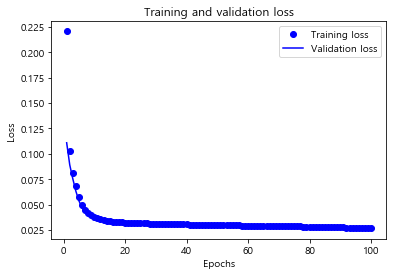

In [35]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')# ‘bo’는 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')# ‘b’는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
pred = model.predict(res_test_x)

In [37]:
## to inverse minmax scale

col_list = test_sample.columns.insert(0,'임시')
tt_index = test_sample[:'2018-06-22'].index # -shfit index

test_inverse_df = pd.DataFrame()

for i in range(1,len(test_sample.columns)-1):# temp col 제외 # 1부터 시작임
    tmp = i*90
    tt = pred.reshape(15930,1)[tmp-90:tmp]    
    test_inverse_df[col_list[i]] = tt.reshape(90,)
    
test_inverse_df = test_inverse_df.set_index(tt_index)
test_inverse_df_array = sc_test.inverse_transform(test_inverse_df)

In [38]:
# inverse minmax scale DataFrame 

res_test_df_B = pd.DataFrame(test_inverse_df_array, columns=test_inverse_df.columns,index=tt_index)

In [39]:
# 예측한 결과물 DataFrame
# res_test_df

In [40]:
# 결과물과 원본 DataFrame 모두 inverse scaling 

In [41]:
test_none_scale = pd.read_csv('test_sample',index_col='Time',parse_dates=True)

In [42]:
# 평일의 index만 추출
B_index = test_none_scale['2018-02-19':].loc[:,:'X230'].resample('B').sum().index

In [43]:
test_none_scale = test_none_scale.loc[:,:'X230'].resample('D').sum()

In [44]:
test_none_scale = test_none_scale.reindex(B_index)

In [45]:
test_none_scale_B = test_none_scale.shift(-5).dropna()

> 결과 체크

In [46]:
test_none_scale_B.columns

Index(['X303', 'X241', 'X435', 'X402', 'X352', 'X305', 'X350', 'X326', 'X299',
       'X160',
       ...
       'X192', 'X283', 'X329', 'X223', 'X266', 'X443', 'X347', 'X75', 'X107',
       'X230'],
      dtype='object', length=177)

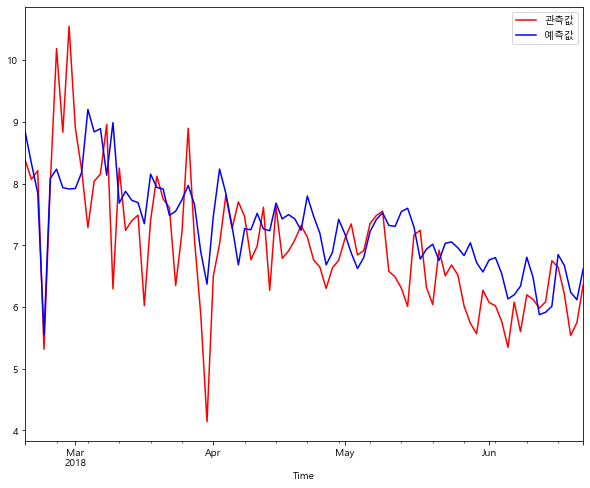

In [82]:
# 일별 예측(평일만)

test_none_scale_B['X241'].plot(figsize=(10,8),color='red',label='관측값')
res_test_df_B['X241'].plot(figsize=(10,8),color='blue',label='예측값')
plt.legend()

In [48]:
##################################### 주말 #################################################################

In [49]:
train_sample = pd.read_csv('train_sample_addFeature',index_col='Time',parse_dates=True)
test_sample = pd.read_csv('test_sample_addFeature',index_col='Time',parse_dates=True)

In [50]:
train_sample = train_sample.resample('D').sum()
test_sample = test_sample.resample('D').sum()

In [51]:
# 토요일/일요일 

a= train_sample['2018-02-17':].index
b= train_sample['2018-02-19':].resample('B').sum().index

list_a = []
for i in range(len(a.values)):
    list_a.append(a.values[i])
list_b = []
for i in range(len(b.values)):
    list_b.append(b.values[i])

list_tmp = []
for i in list_a:
    if i not in list_b:
        list_tmp.append(i)

In [52]:
list_tmp # 토요일/일요일
saturday_sunday = np.array(list_tmp) # 툐요일/일요일 index => ndarray

In [53]:
a_test= test_sample['2018-02-17':].index
b_test= test_sample['2018-02-19':].resample('B').sum().index

list_a_test = []
for i in range(len(a_test.values)):
    list_a_test.append(a_test.values[i])
list_b_test = []
for i in range(len(b_test.values)):
    list_b_test.append(b_test.values[i])

list_tmp_test = []
for i in list_a_test:
    if i not in list_b_test:
        list_tmp_test.append(i)

In [54]:
train_sample = train_sample.reindex(saturday_sunday) # 토요일/일요일 인덱스로 df 재설정
test_sample = test_sample.reindex(saturday_sunday) # 토요일/일요일 인덱스로 df 재설정

train_sample = train_sample[:'2018-06-24']
test_sample = test_sample[:'2018-06-24']

In [55]:
from sklearn.preprocessing import MinMaxScaler

sc_train = MinMaxScaler() # trainSet scaler
sc_test = MinMaxScaler() # testSet scaler
sc_temp = MinMaxScaler() # temp scaler
sc_humidity = MinMaxScaler() # temp scaler


train_sample_sc = sc_train.fit_transform(train_sample.iloc[:,:-4])
test_sample_sc = sc_test.fit_transform(test_sample.iloc[:,:-4])
temp_sc = sc_temp.fit_transform(train_sample[['temp']])
humidity_sc = sc_humidity.fit_transform(train_sample[['humidity']])


train_sample_sc = np.concatenate((train_sample_sc, temp_sc), axis=1)
train_sample_sc = np.concatenate((train_sample_sc, humidity_sc), axis=1)




test_sample_sc = np.concatenate((test_sample_sc, temp_sc), axis=1)
test_sample_sc = np.concatenate((test_sample_sc, humidity_sc), axis=1)

In [56]:
train_sample = pd.DataFrame(train_sample_sc, columns=train_sample.columns[:-2],index=train_sample.index)
test_sample = pd.DataFrame(test_sample_sc, columns=test_sample.columns[:-2],index=test_sample.index)

In [57]:
shift_step = 2
feature_len = 3

In [58]:
tmp_list = [] 
for i in train_sample.columns[:-2]:
    tmp_list.append(train_sample[[i,'temp','humidity']].values[:-shift_step].reshape(18,2,3)) 

to_formatted_x = np.array(tmp_list)

In [59]:
res_x = to_formatted_x.reshape(to_formatted_x.shape[0]*to_formatted_x.shape[1],shift_step,feature_len)

res_x.shape

(22536, 2, 3)

In [60]:
for_shifting_y = train_sample.shift(-shift_step)
# for_shifting_y=for_shifting_y.dropna()

tmp_shift_list = []
for i in train_sample.columns[:-2]:
    tmp_shift_list.append(for_shifting_y[i].values[:-shift_step].reshape(18,2,1))

to_formatted_y = np.array(tmp_shift_list)

In [61]:
res_y = to_formatted_y.reshape(to_formatted_x.shape[0]*to_formatted_x.shape[1],shift_step,1)

res_y.shape

(22536, 2, 1)

In [62]:
tmp_test_list = [] 
for i in test_sample.columns[:-2]:
    tmp_test_list.append(test_sample[[i,'temp','humidity']].values[:-shift_step].reshape(18,2,3)) 

to_formatted_test_x = np.array(tmp_test_list)

In [63]:
res_test_x = to_formatted_test_x.reshape(to_formatted_test_x.shape[0]*to_formatted_test_x.shape[1],shift_step,feature_len)

res_test_x.shape

(3186, 2, 3)

In [64]:
for_shifting_y = test_sample.shift(-shift_step)

tmp_test_shift_list = []
for i in test_sample.columns[:-2]:
    tmp_test_shift_list.append(for_shifting_y[i].values[:-shift_step].reshape(18,2,1))

to_formatted_test_y = np.array(tmp_test_shift_list)

In [65]:
res_test_y = to_formatted_test_y.reshape(to_formatted_test_x.shape[0]*to_formatted_test_x.shape[1],shift_step,1)

res_test_y.shape

(3186, 2, 1)

In [66]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 
from keras.layers import TimeDistributed
K.clear_session()

model = Sequential() # Sequeatial Model 
model.add(LSTM(128, input_shape=(2, 3),return_sequences=True)) # (timestep, feature)
model.add(TimeDistributed(Dense(1, activation="linear")))
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2, 128)            67584     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2, 1)              129       
Total params: 67,713
Trainable params: 67,713
Non-trainable params: 0
_________________________________________________________________


In [67]:
# 모델 학습
early_stop = EarlyStopping(monitor='loss',patience=4, verbose=1)

history = model.fit(res_x,res_y,epochs=130,batch_size=512,verbose=1,validation_split=0.2,shuffle=True,callbacks=[early_stop])

Train on 18028 samples, validate on 4508 samples
Epoch 1/130
18028/18028 [==============================] - 1s 59us/step - loss: 0.1701 - val_loss: 0.1027
Epoch 2/130
18028/18028 [==============================] - 1s 35us/step - loss: 0.0870 - val_loss: 0.0722
Epoch 3/130
18028/18028 [==============================] - 1s 37us/step - loss: 0.0656 - val_loss: 0.0606
Epoch 4/130
18028/18028 [==============================] - 1s 39us/step - loss: 0.0601 - val_loss: 0.0582
Epoch 5/130
18028/18028 [==============================] - 1s 38us/step - loss: 0.0583 - val_loss: 0.0569
Epoch 6/130
18028/18028 [==============================] - 1s 39us/step - loss: 0.0573 - val_loss: 0.0563
Epoch 7/130
18028/18028 [==============================] - 1s 38us/step - loss: 0.0566 - val_loss: 0.0556
Epoch 8/130
18028/18028 [==============================] - 1s 40us/step - loss: 0.0561 - val_loss: 0.0552
Epoch 9/130
18028/18028 [==============================] - 1s 39us/step - loss: 0.0557 - val_loss: 0.05

Epoch 77/130
18028/18028 [==============================] - 1s 36us/step - loss: 0.0468 - val_loss: 0.0464
Epoch 78/130
18028/18028 [==============================] - 1s 36us/step - loss: 0.0466 - val_loss: 0.0457
Epoch 79/130
18028/18028 [==============================] - 1s 35us/step - loss: 0.0464 - val_loss: 0.0454
Epoch 80/130
18028/18028 [==============================] - 1s 35us/step - loss: 0.0461 - val_loss: 0.0456
Epoch 81/130
18028/18028 [==============================] - 1s 36us/step - loss: 0.0459 - val_loss: 0.0456
Epoch 82/130
18028/18028 [==============================] - 1s 35us/step - loss: 0.0456 - val_loss: 0.0447
Epoch 83/130
18028/18028 [==============================] - 1s 38us/step - loss: 0.0453 - val_loss: 0.0443
Epoch 84/130
18028/18028 [==============================] - 1s 36us/step - loss: 0.0452 - val_loss: 0.0442
Epoch 85/130
18028/18028 [==============================] - 1s 36us/step - loss: 0.0450 - val_loss: 0.0441
Epoch 86/130
18028/18028 [===========

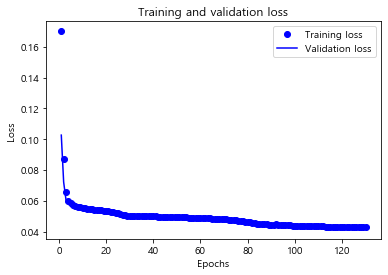

In [68]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')# ‘bo’는 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')# ‘b’는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
pred = model.predict(res_test_x)

In [70]:
test_sample.columns

Index(['X303', 'X241', 'X435', 'X402', 'X352', 'X305', 'X350', 'X326', 'X299',
       'X160',
       ...
       'X329', 'X223', 'X266', 'X443', 'X347', 'X75', 'X107', 'X230', 'temp',
       'humidity'],
      dtype='object', length=179)

In [71]:
pred.shape

(3186, 2, 1)

In [72]:
## to inverse minmax scale

col_list = test_sample.columns.insert(0,'임시')
tt_index = test_sample[:'2018-06-17'].index # -shift 인덱스 반영

test_inverse_df = pd.DataFrame()

for i in range(1,len(test_sample.columns)-1): # 1부터시작
    tmp = i*36
    tt = pred.reshape(6372,1)[tmp-36:tmp]    
    test_inverse_df[col_list[i]] = tt.reshape(36,)
    
test_inverse_df = test_inverse_df.set_index(tt_index)
test_inverse_df_array = sc_test.inverse_transform(test_inverse_df)

In [73]:
# inverse minmax scale DataFrame 

res_test_df_W = pd.DataFrame(test_inverse_df_array, columns=test_inverse_df.columns,index=tt_index)

In [74]:
test_none_scale = pd.read_csv('test_sample',index_col='Time',parse_dates=True)

In [75]:
# 주말 비교용
test_none_scale_W = test_none_scale[:"2018-06-24"].loc[:,:'X230'].resample('D').sum()

In [76]:
test_none_scale_W = test_none_scale_W.reindex(saturday_sunday)

In [77]:
test_none_scale_W = test_none_scale_W.shift(-2).dropna()

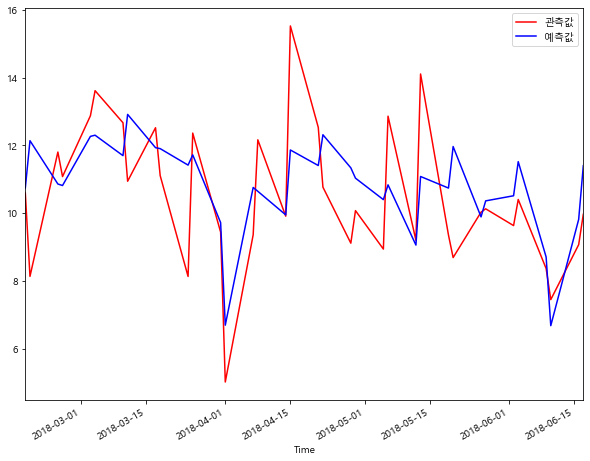

In [78]:
# 일별 예측(주말만)
test_none_scale_W['X305'].plot(figsize=(10,8),color='red',label='관측값')
res_test_df_W['X305'].plot(figsize=(10,8),color='blue',label='예측값')
plt.legend()

In [79]:
##################################평일 주말 DataFrame 병합 ########################################################

In [80]:
res_test_df_Full = pd.concat([res_test_df_B, res_test_df_W]).sort_index()
test_none_scale_Full = pd.concat([test_none_scale_B, test_none_scale_W]).sort_index()

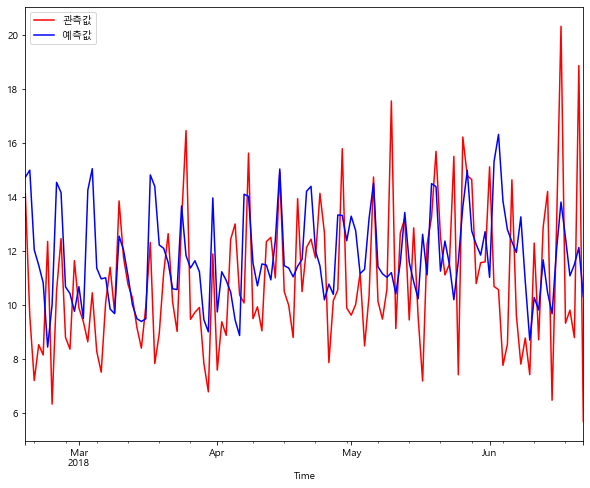

In [81]:
test_none_scale_Full['X303'].plot(figsize=(10,8),color='red',label="관측값")
res_test_df_Full['X303'].plot(figsize=(10,8),color='blue',label="예측값")
plt.legend()